# Import necessary dependencies

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import math as math
import itertools as it

pd.options.display.max_columns = None

%matplotlib inline

# Load and merge datasets

In [77]:
columns = ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 
'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 
'hispanic origin', 'sex', 'member', 'reason for unemployment', 'full or part time employment stat', 
'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 
'state of previous residence', 'detailed household and family stat', 'detailed household summary in household',  
'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 
'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 
'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 
'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks worked in year', 'year', '???']

raw_data = pd.read_csv('./Data Sets/Census-Income/census-income.data', sep=',', names = columns)

# re-shuffle records just to randomize data points
raw_data = raw_data.sample(frac=1, random_state=42).reset_index(drop=True)
raw_data.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,???
0,47,Local government,43,26,High school graduate,0,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,617.17,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,22,94,- 50000.
1,39,Private,25,26,High school graduate,0,Not in universe,Divorced,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,1314.73,?,?,?,Not in universe under 1 year old,?,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
2,56,Private,41,8,Associates degree-occup /vocational,600,Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,White,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,2227.14,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
3,39,Federal government,50,6,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Public administration,Professional specialty,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,375,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1203.99,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
4,11,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Midwest,Indiana,Child <18 never marr not in subfamily,Child under 18 never married,1959.69,MSA to MSA,Different county same state,Different county same state,No,No,0,Mother only present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


# Show dataset features and values

In [79]:
# Examine only a subset of all attributes
subset_attributes = [
    'age',
    'class of worker', 
    #'detailed industry recode',
    #'detailed occupation recode', 
    'education', 
    'wage per hour', 
    #'enroll in edu inst last wk', 
    'marital stat', 
    'major industry code', 
    'major occupation code', 
    'race', 
    'hispanic origin', 
    'sex', 
    #'member', 
    #'reason for unemployment', 
    #'full or part time employment stat', 
    #'capital gains', 
    #'capital losses', 
    #'dividends from stocks', 
    #'tax filer stat', 
    'region of previous residence', 
    #'detailed household and family stat', 
    #'detailed household summary in household',  
    #'instance weight',
    #'migration code-change in msa', 
    #'migration code-change in reg', 
    #'migration code-move within reg', 
    #'live in this house 1 year ago', 
    #'migration prev res in sunbelt',
    #'num persons worked for employer', 
    #'family members under 18', 
    #'country of birth father', 
    #'country of birth mother', 
    #'country of birth self', 
    #'citizenship', 
    'own business or self employed', 
    #'fill inc questionnaire for veterans admin', 
    #'veterans benefits', 
    #'weeks worked in year',
    'year'
    #'???'
]

numericalColumns = ['age', 'wage per hour', ]

categoryColumns = [
    'class of worker', 
    'education', 
    'marital stat', 
    'major industry code', 
    'major occupation code', 
    'race', 
    'hispanic origin', 
    'sex', 
    'region of previous residence', 
    'own business or self employed', 
    'year'
]

# Assumption: The wage per hour is reprecented in Dollar Cents. For clearer interpretation it is converted to Dollars.
#raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: value / 100)

# Fix wage per hour = 0
raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: None if value == 0 else value)

data=raw_data[subset_attributes]
data.head()

,age,class of worker,education,wage per hour,marital stat,major industry code,major occupation code,race,hispanic origin,sex,region of previous residence,own business or self employed,year
0,47,Local government,High school graduate,NaN,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,Not in universe,0,94
1,39,Private,High school graduate,NaN,Divorced,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Not in universe,0,95
2,56,Private,Associates degree-occup /vocational,600.0,Married-civilian spouse present,Hospital services,Professional specialty,White,All other,Female,Not in universe,0,95
3,39,Federal government,Bachelors degree(BA AB BS),NaN,Married-civilian spouse present,Public administration,Professional specialty,White,All other,Female,Not in universe,0,94
4,11,Not in universe,Children,NaN,Never married,Not in universe or children,Not in universe,White,All other,Female,Midwest,0,94


# Exploratory Data Analysis and Visualizations

## Descriptive Statistics

In [37]:

#rs = round(red_wine[subset_attributes].describe(),2)
#ws = round(white_wine[subset_attributes].describe(),2)
#pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

round(data[numericalColumns].describe(),2)

,age,wage per hour
count,199523.00,11304.00
mean,34.49,978.32
std,22.31,656.48
min,0.00,20.00
25%,15.00,584.75
50%,33.00,800.00
75%,50.00,1200.00
max,90.00,9999.00


# Univariate Analysis

## Visualizing one dimension

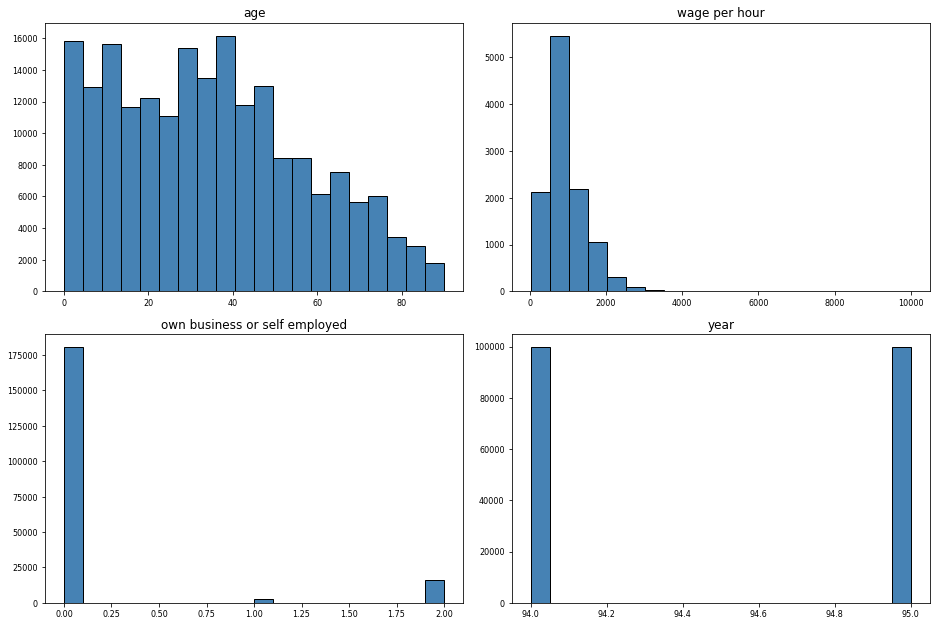

In [39]:
data.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.2, 2.2))   

### Continuous, numeric attribute in 1-D

<AxesSubplot:xlabel='wage per hour', ylabel='Density'>

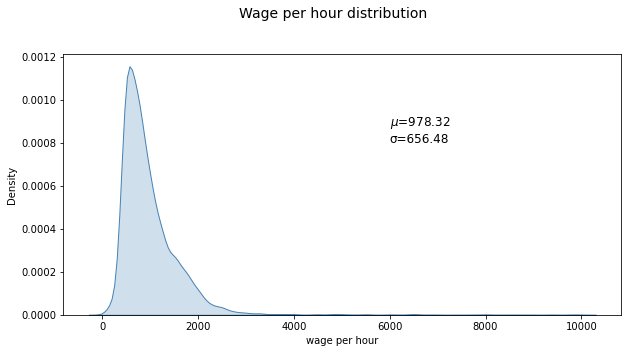

In [47]:
attribute='wage per hour'

fig = plt.figure(figsize = (10, 5))
title = fig.suptitle("Wage per hour distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel(attribute)
ax1.set_ylabel("Density") 
ax1.text(6000, 0.0008, r'$\mu$='+str(round(data[attribute].mean(),2)) + '\n\u03C3='+str(round(data[attribute].std(),2)), fontsize=12)
sns.kdeplot(data[attribute], ax=ax1, shade=True, color='steelblue')

### Discrete, categorical attribute in 1-D

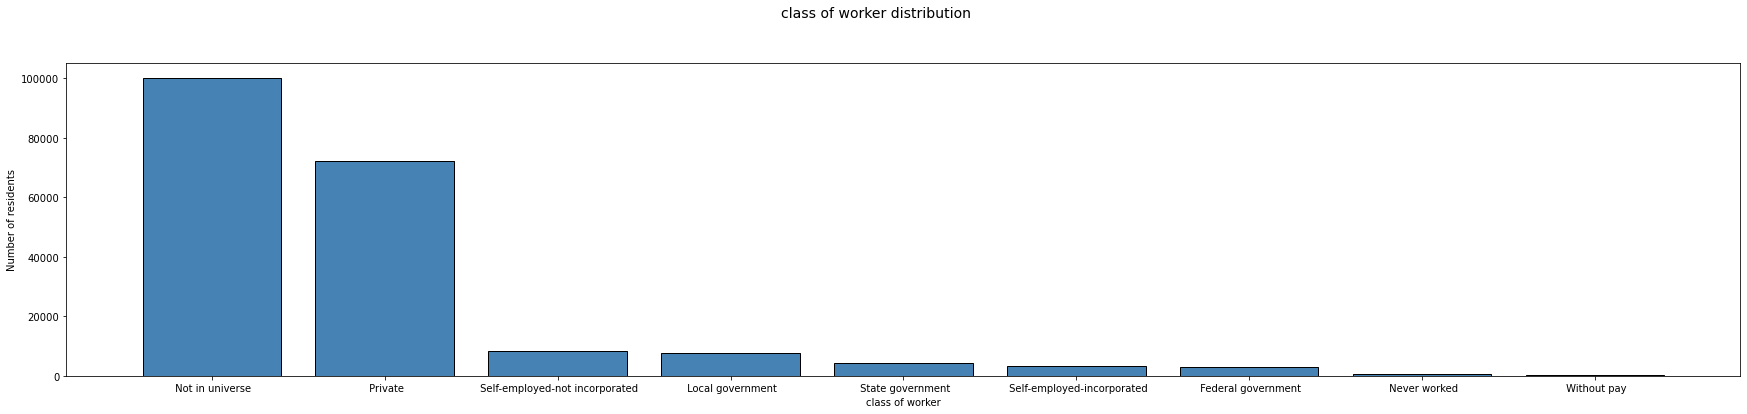

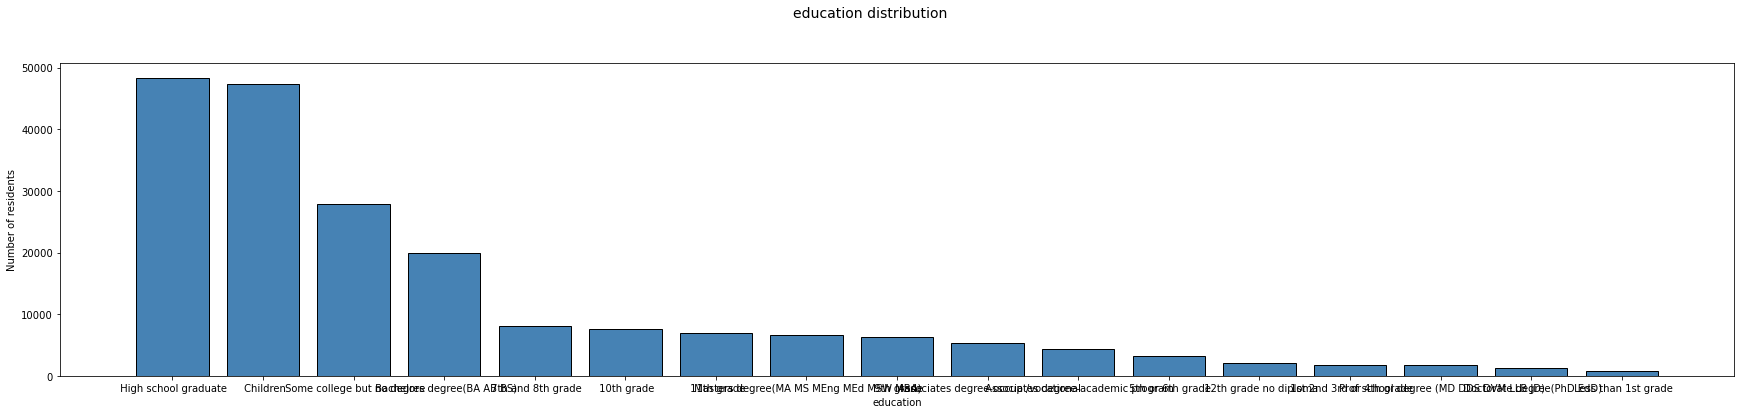

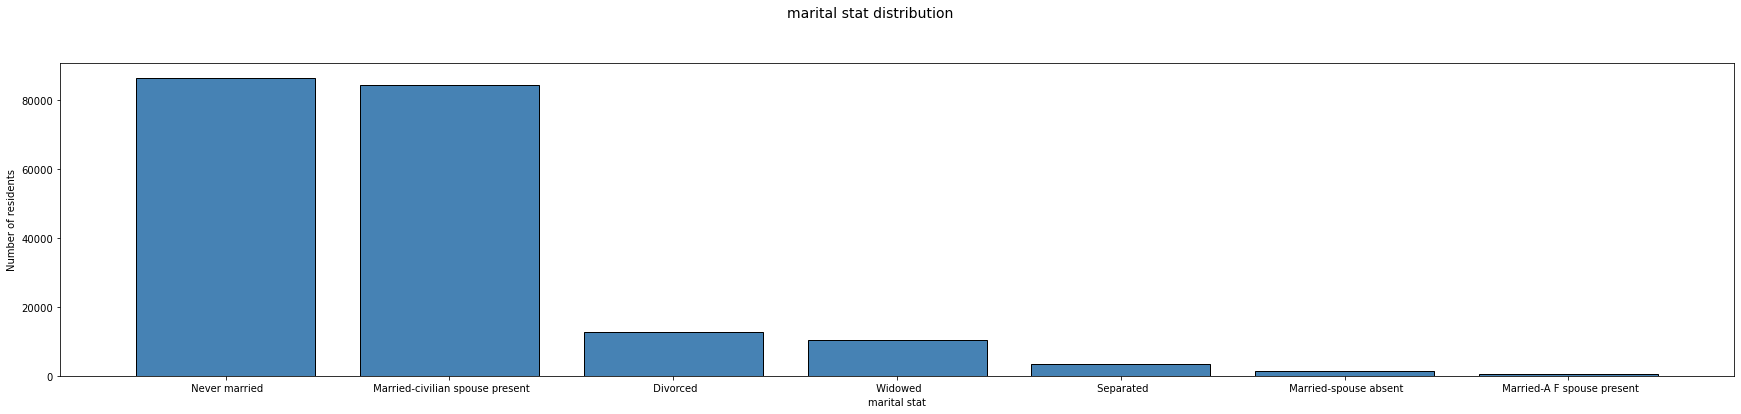

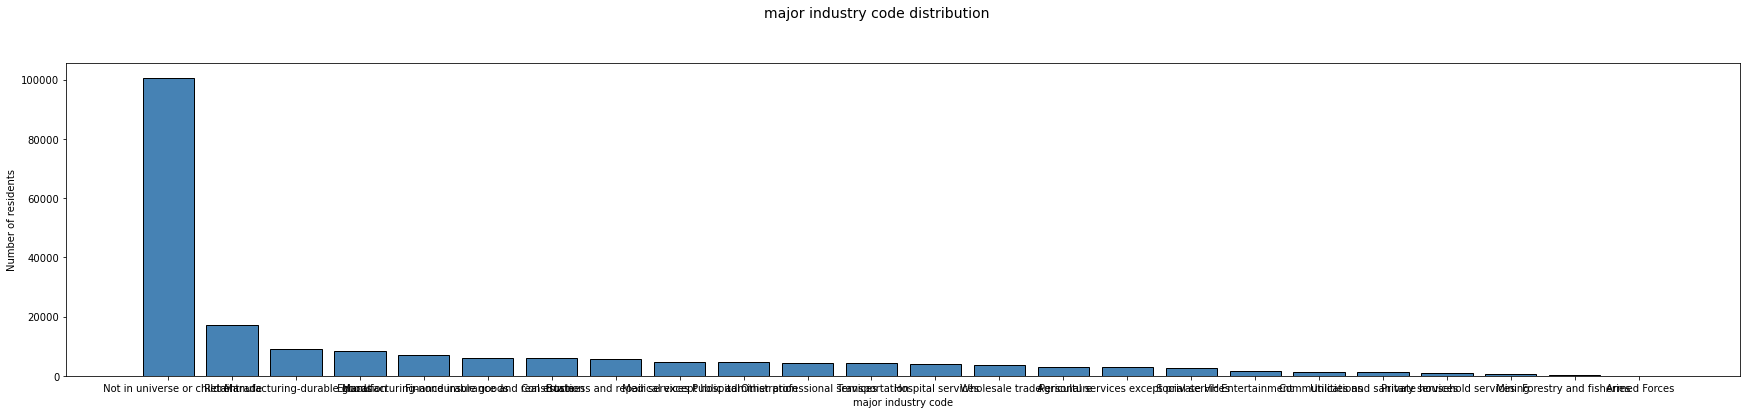

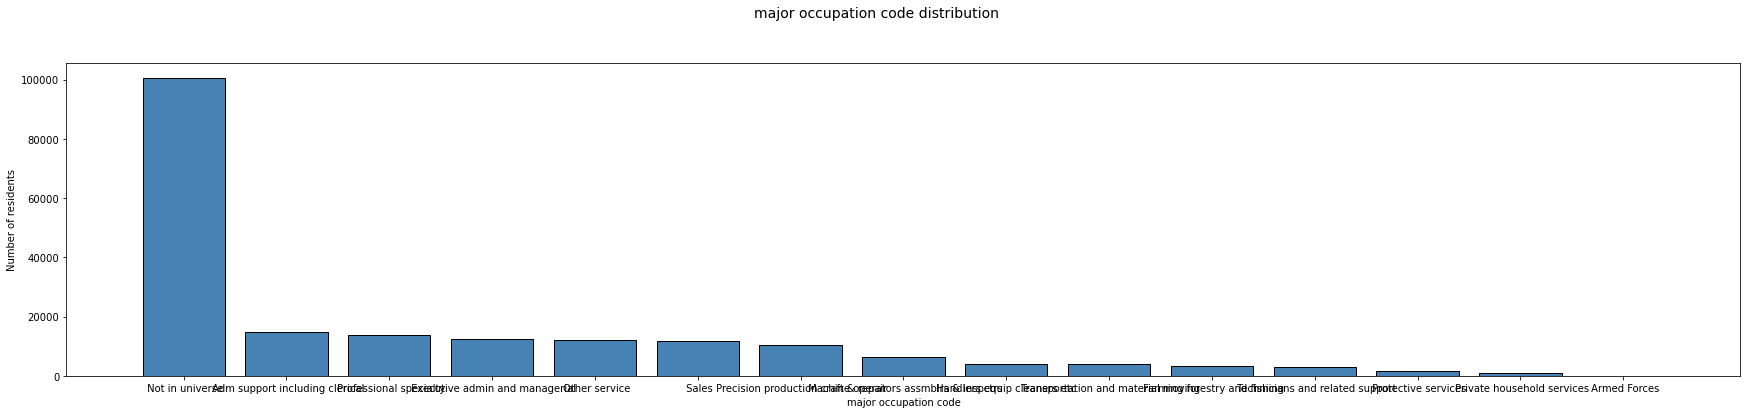

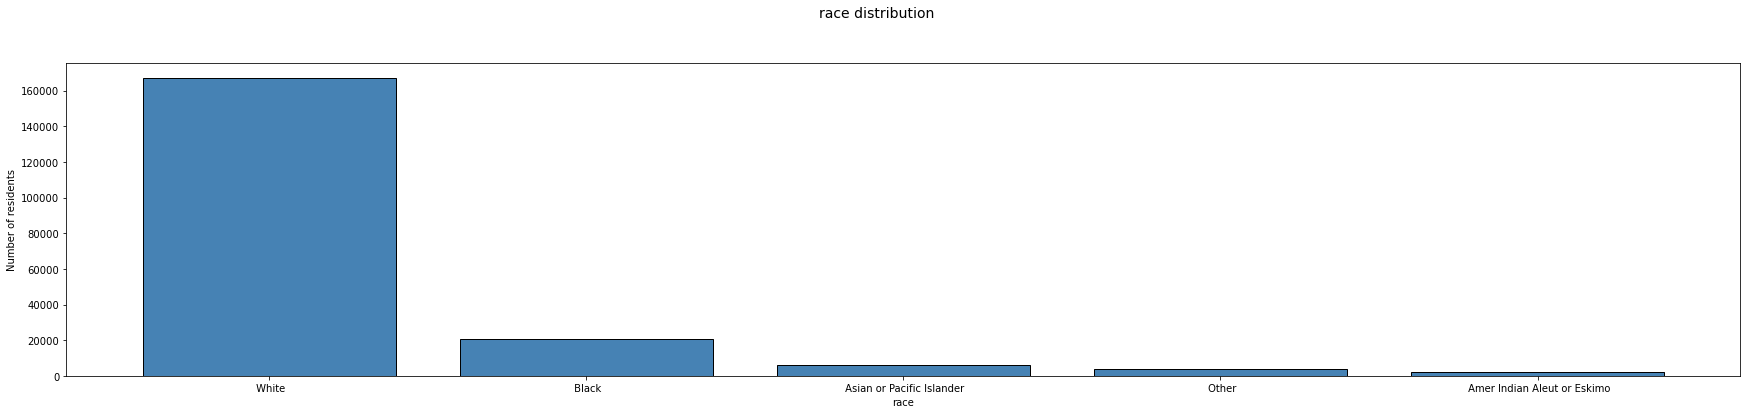

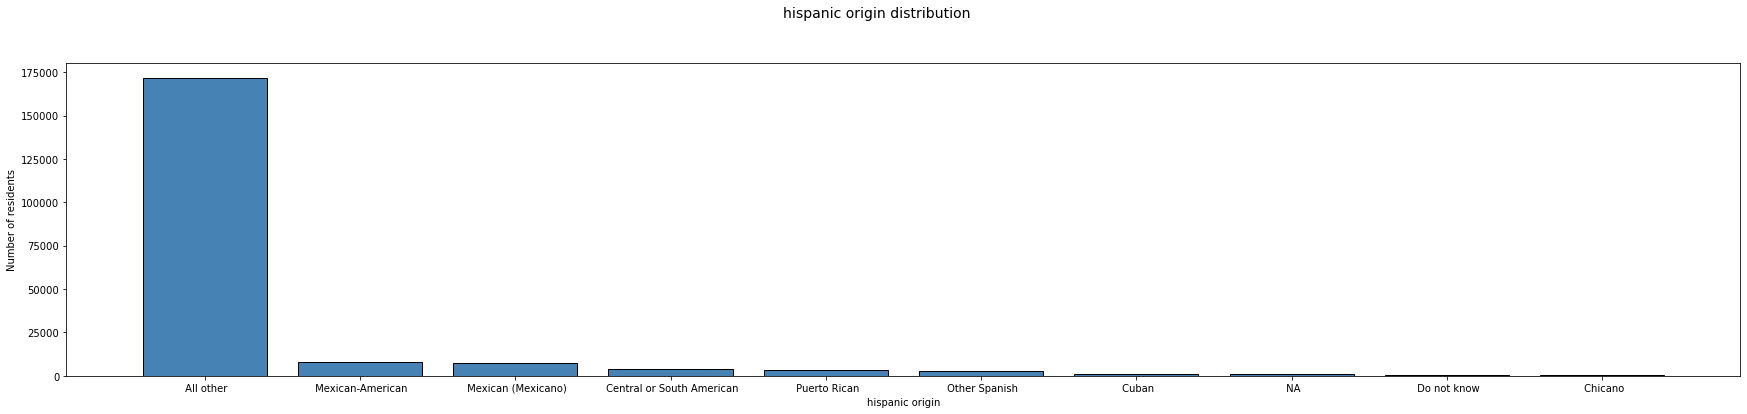

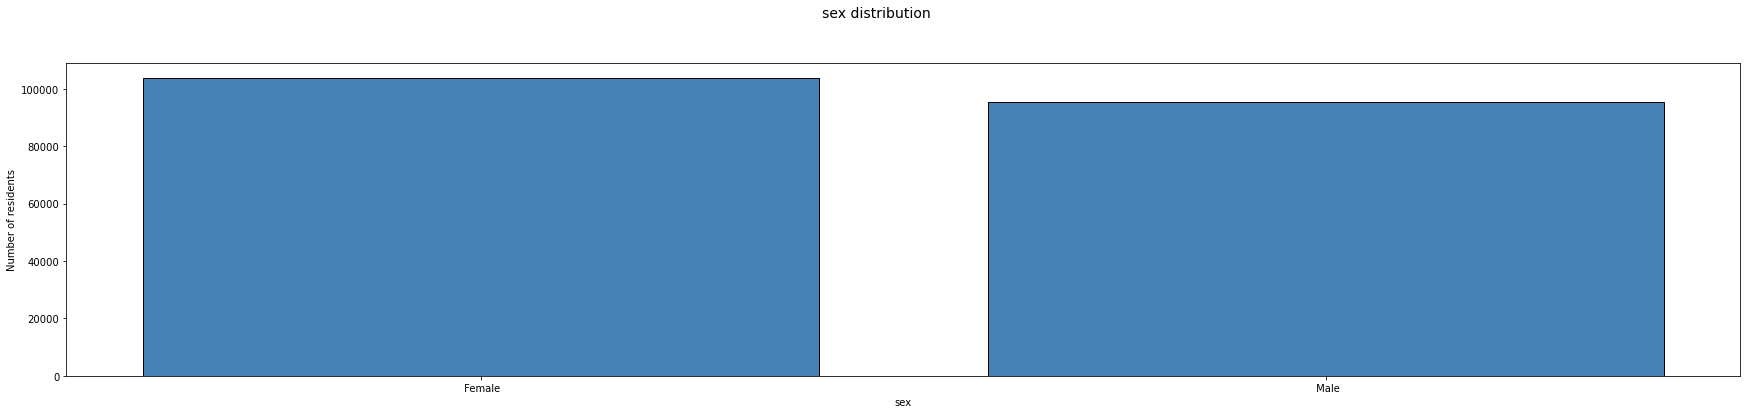

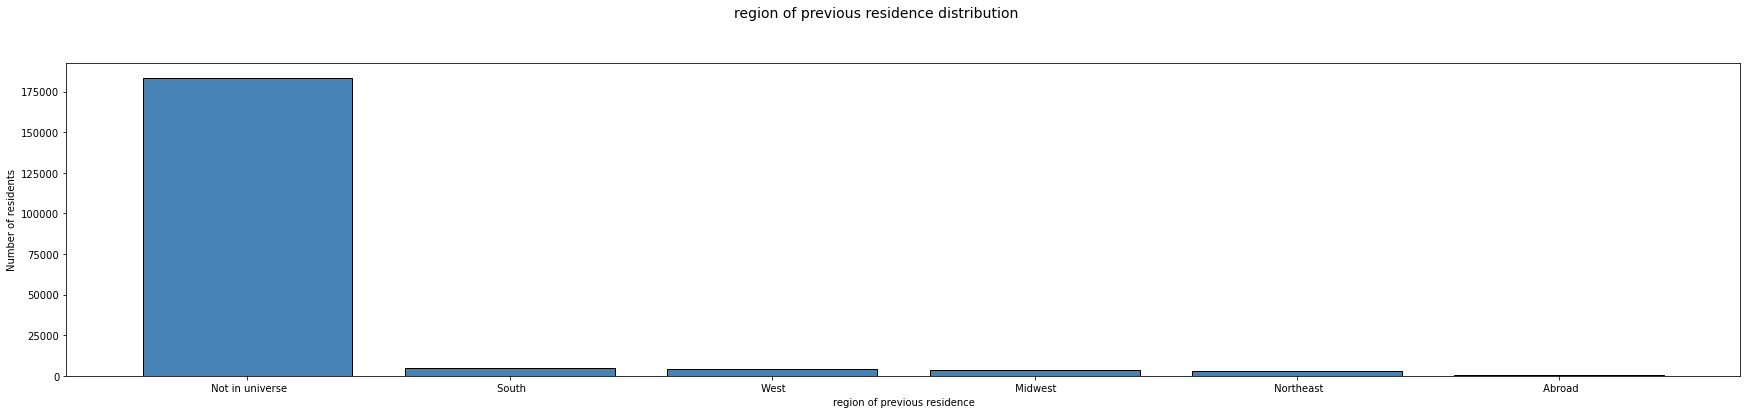

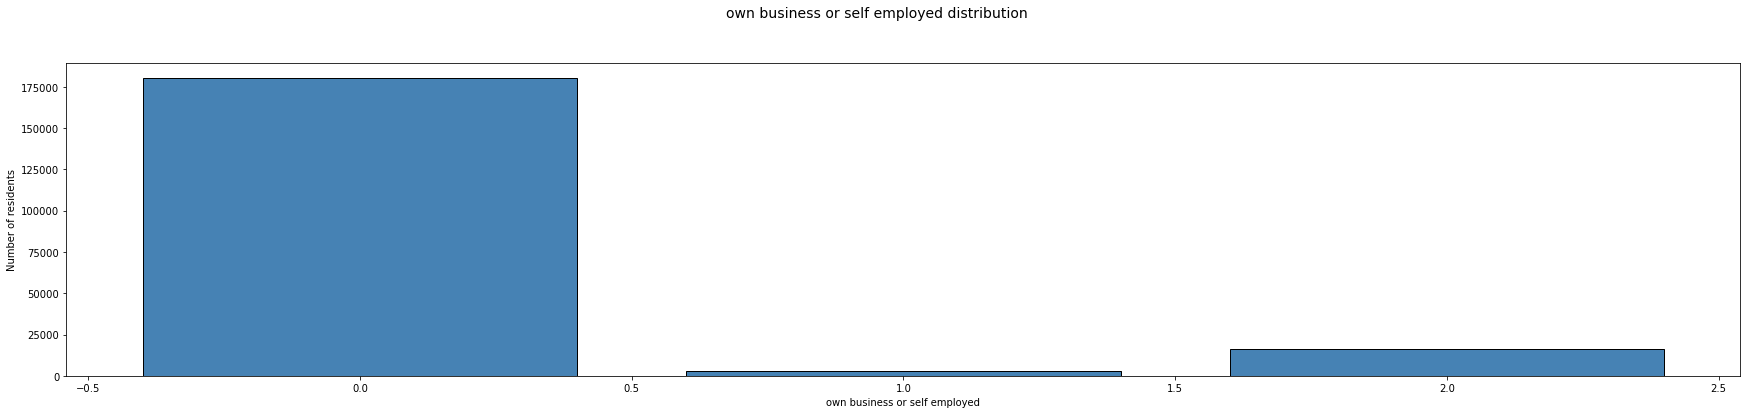

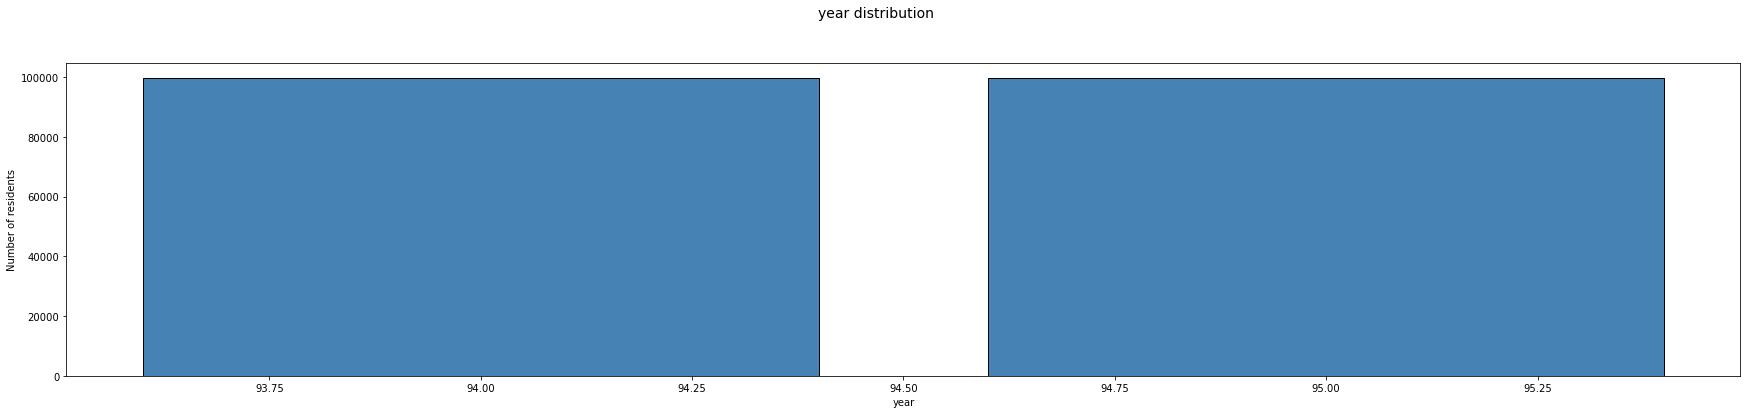

In [59]:
def printFigure(column):
        fig = plt.figure(figsize = (30, 6))
        title = fig.suptitle(column + " distribution", fontsize=14)
        fig.subplots_adjust(top=0.85, wspace=0.3)

        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlabel(column)
        ax.set_ylabel("Number of residents") 
        w_q = data[column].value_counts()
        w_q = (list(w_q.index), list(w_q.values))
        ax.tick_params(axis='both', which='major', labelsize=10)
        bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
                edgecolor='black', linewidth=1)

for column in categoryColumns:
        printFigure(column)


# Multivariate Analysis

## Visualizing two dimensions

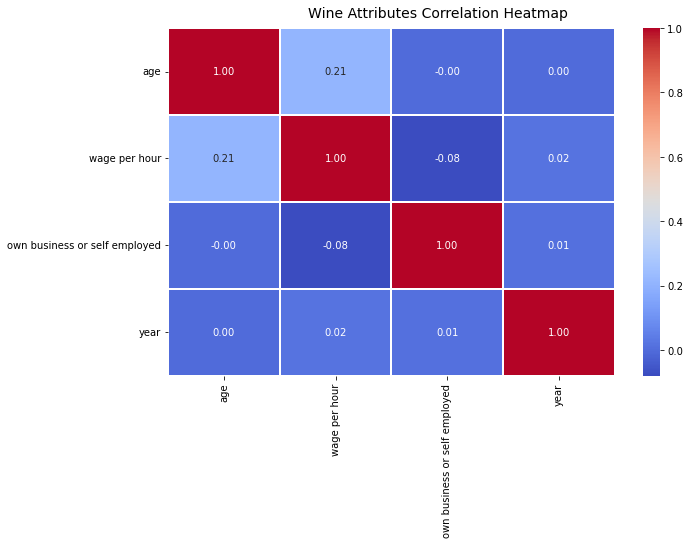

In [60]:
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

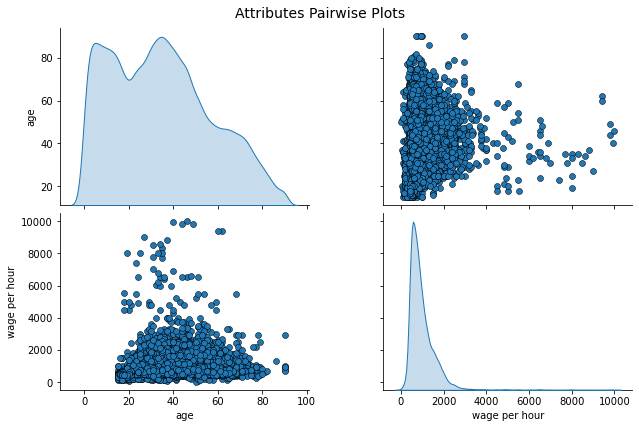

In [61]:
cols = numericalColumns
pp = sns.pairplot(data[cols], height=3.0, aspect=1.5,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

### Two Continuous Numeric attributes 

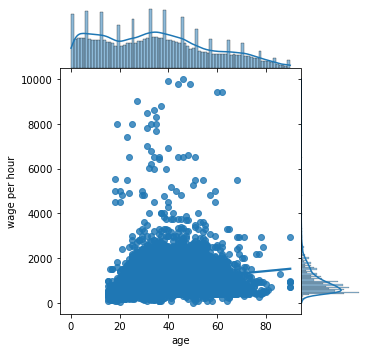

In [63]:
jp = sns.jointplot(x='age', y='wage per hour', data=data,
              kind='reg', space=0, height=5, ratio=4)

### Two Discrete Categorical attributes 

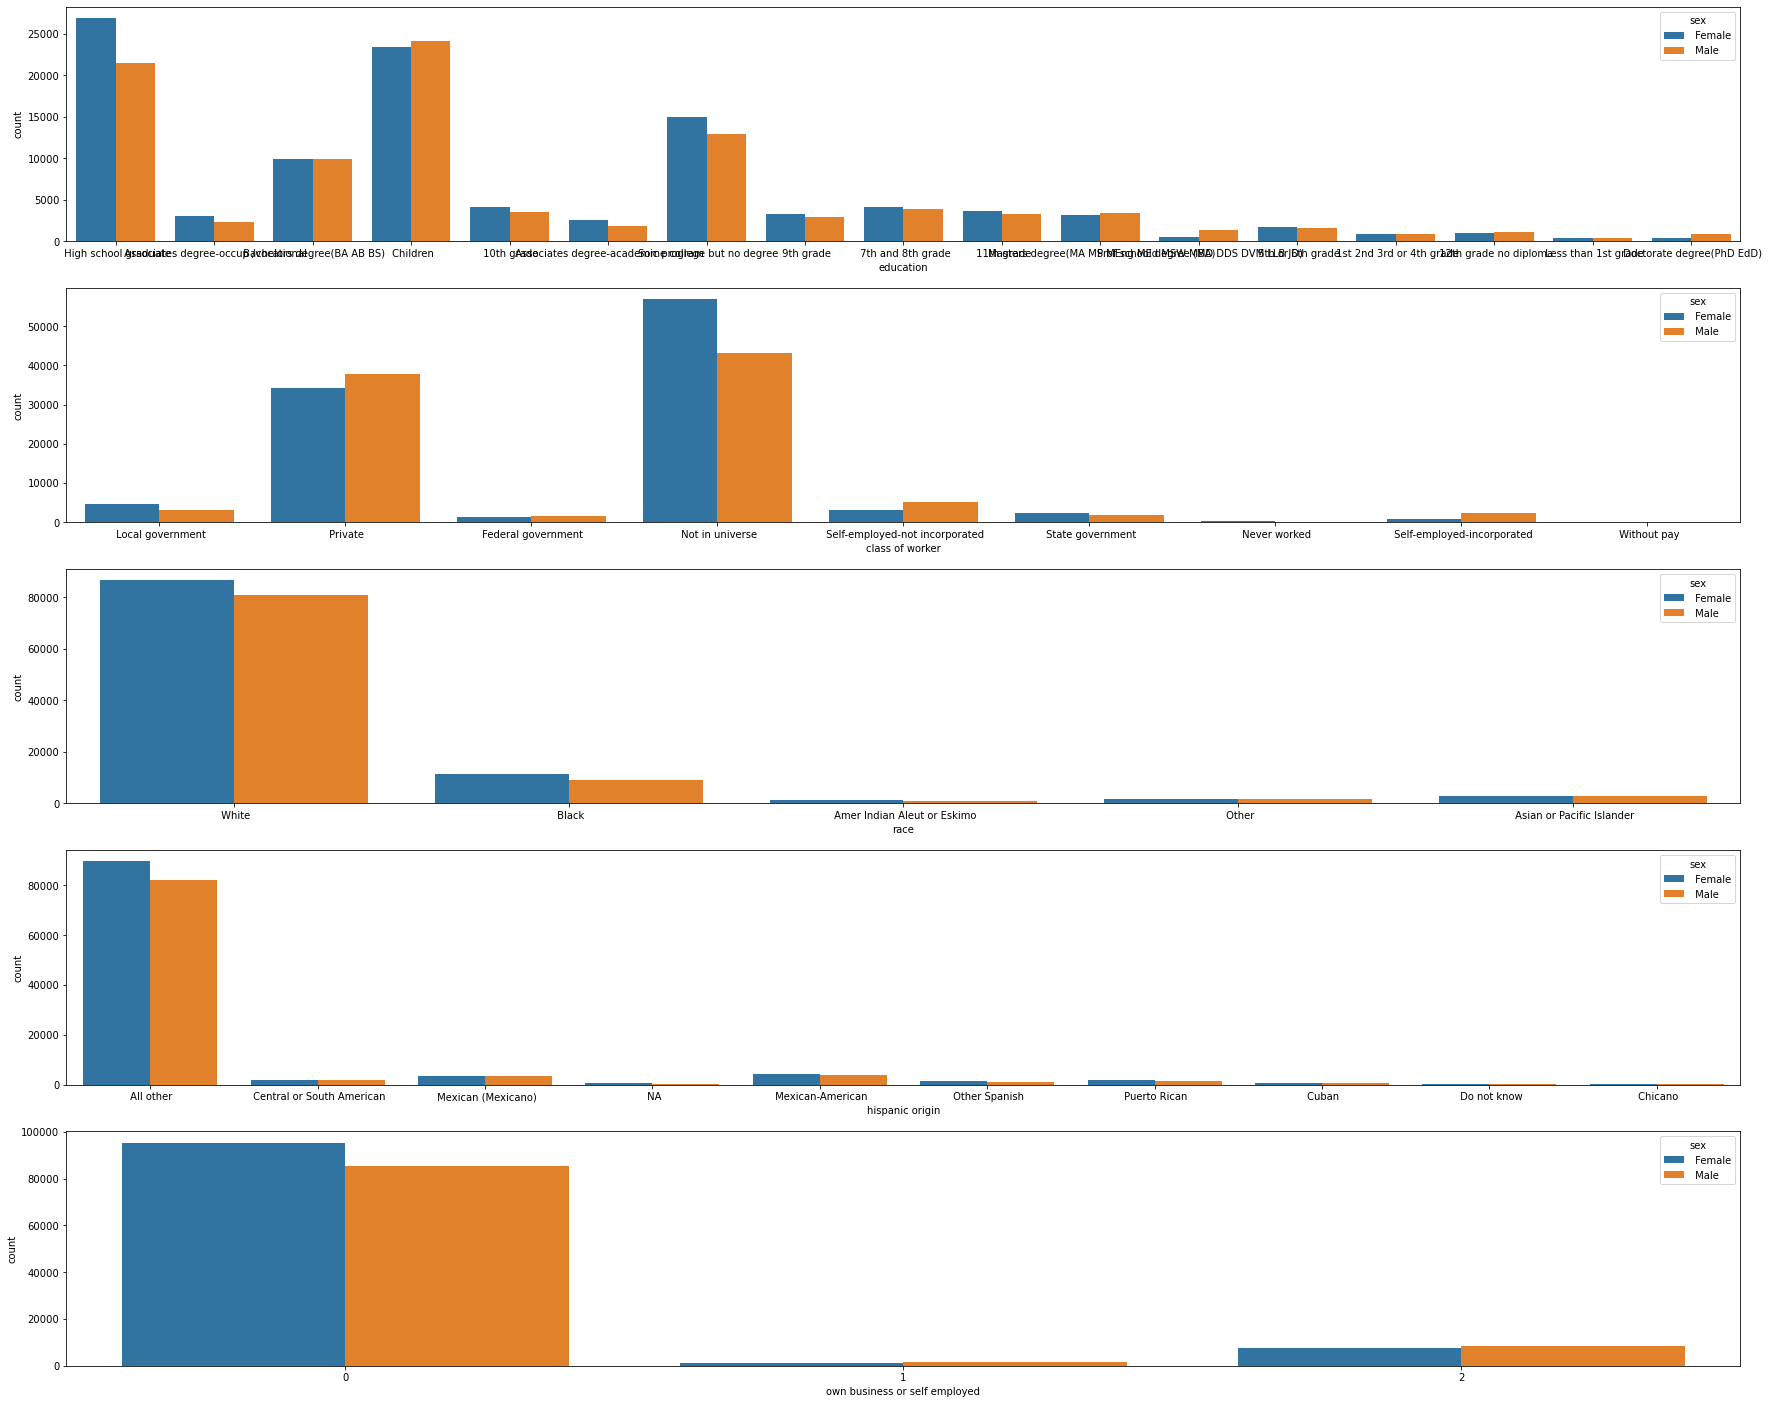

In [69]:
def printFigure(category_a, category_b, ax_idx):
    sns.countplot(x=category_a, hue=category_b, data=data, ax=ax_idx)

combinations = [
    ['education', 'sex'],
    ['class of worker', 'sex'],
    ['race', 'sex'],
    ['hispanic origin', 'sex'],
    ['own business or self employed', 'sex']
]

num_combinations = len(combinations)

num_rows = num_combinations

fig, ax =plt.subplots(num_rows, 1, figsize=(30, 5*num_rows))

idx=0

for cat_a, cat_b in combinations:
    if cat_a == cat_b:
        continue

    printFigure(cat_a, cat_b, ax[idx])
    idx+=1

### Mixed attributes (numeric & categorical)

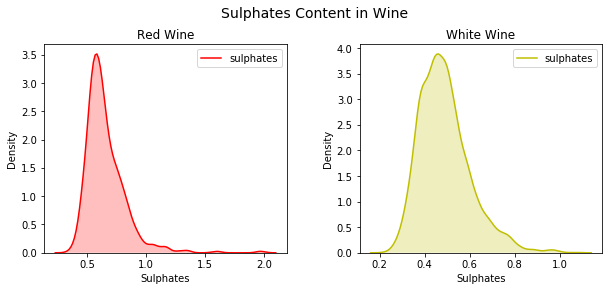

Text(0, 0.5, 'Wine Alcohol %')

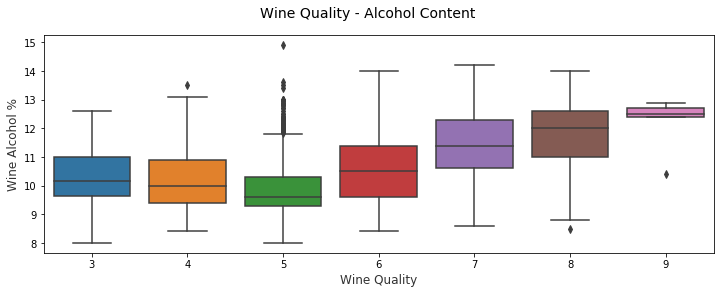

In [21]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

## Visualizing three dimensions

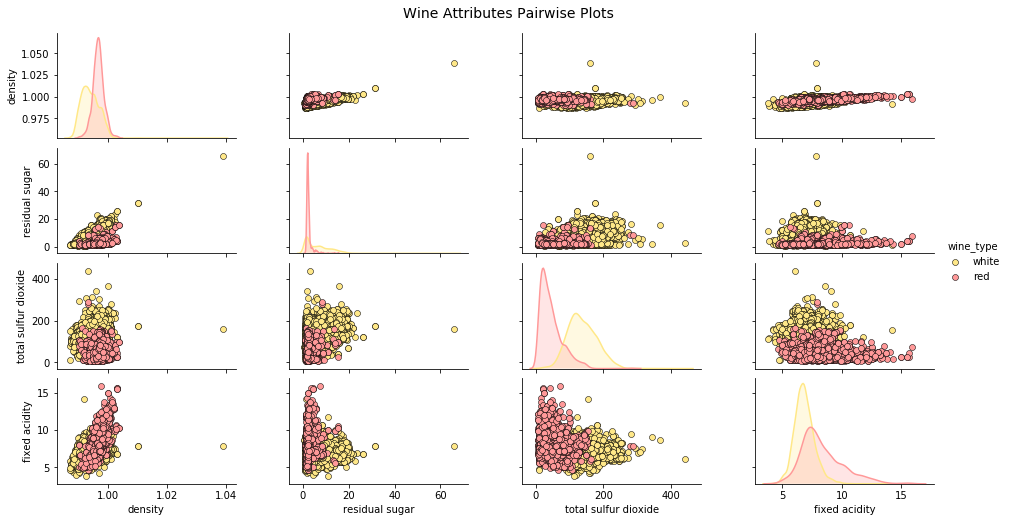

In [23]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', height=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

### Mixed attributes (Numeric & Categorical)

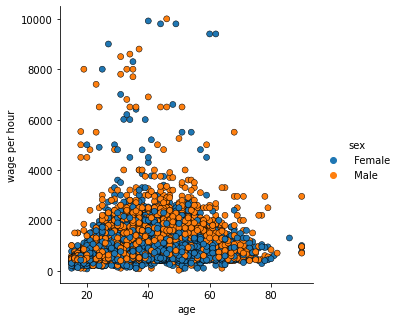

In [74]:
jp = sns.pairplot(data, x_vars=["age"], y_vars=["wage per hour"], height=4.5,
                  hue="sex", 
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

0
0


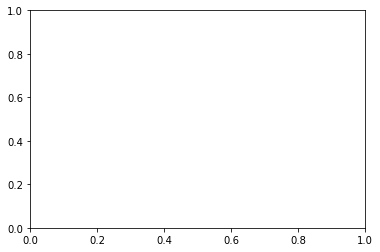

In [86]:
maleData = data[data['sex'] == 'Male']
femaleData = data[data['sex'] == 'Female']

print(len(maleData))
print(len(femaleData))

ax = sns.kdeplot(maleData['age'], maleData['wage per hour'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(femaleData['age'], femaleData['wage per hour'],
                  cmap="Reds", shade=True, shade_lowest=False)

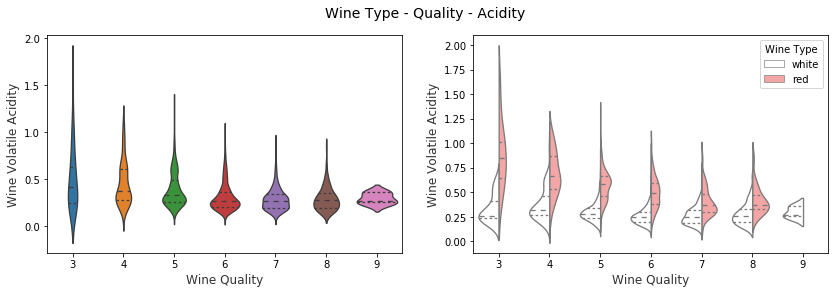

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

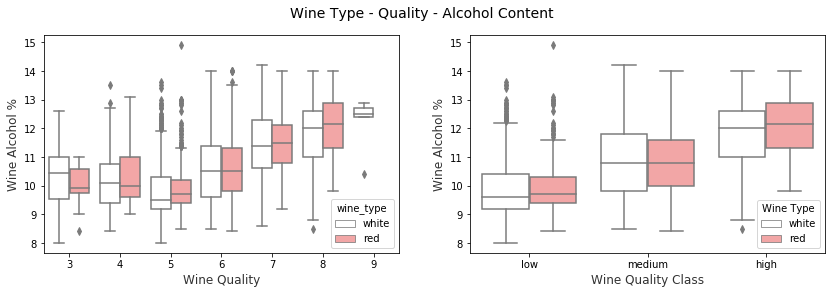

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')

## Visualizing four dimensions

In [1]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

NameError: name 'plt' is not defined

Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

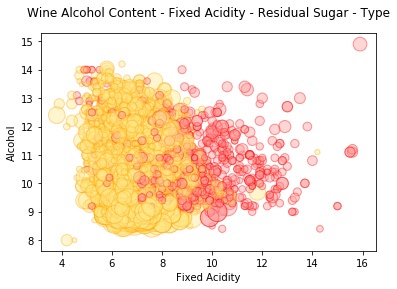

In [33]:
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

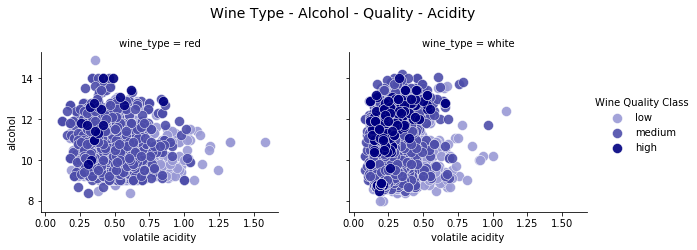

In [34]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, height=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

/home/rudi/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


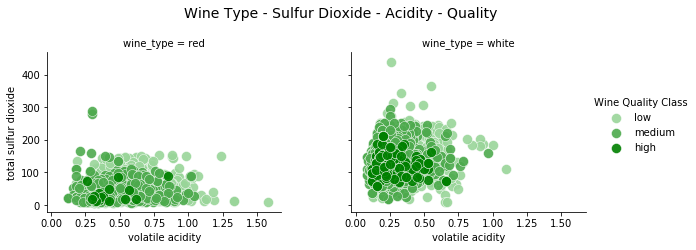

In [35]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('green', 4)[1:])
g.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

## Visualizing five dimensions

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5, 0, 'Fixed Acidity')

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (0,4) and requested shape (1,4)

<Figure size 576x432 with 1 Axes>

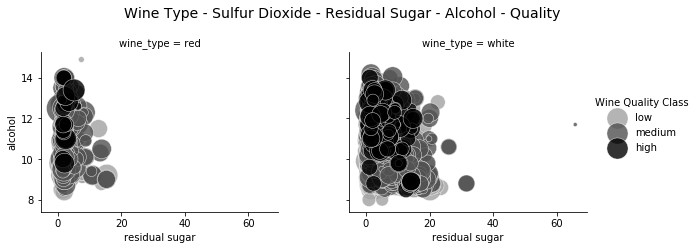

In [37]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('black', 4)[1:])
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.8, 
      edgecolor='white', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

## Visualizing six dimensions

In [38]:
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5, 0, 'Fixed Acidity')

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (0,4) and requested shape (1,4)

<Figure size 576x432 with 1 Axes>

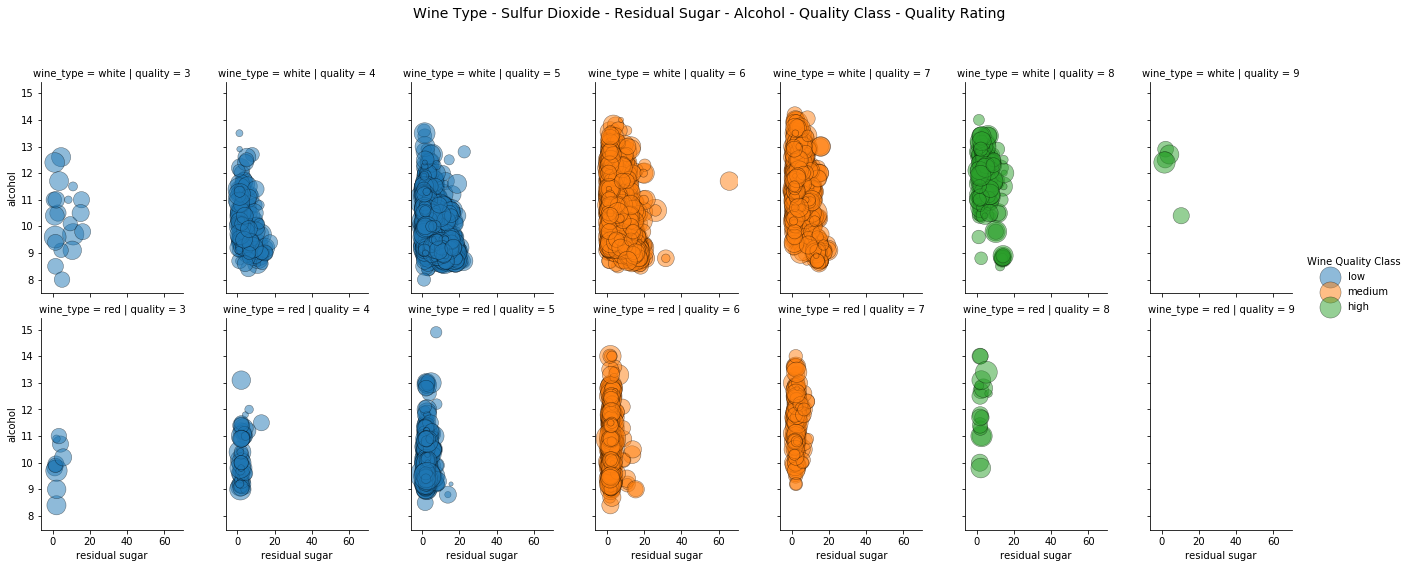

In [39]:
g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', size=4)
g.map(plt.scatter,  "residual sugar", "alcohol", alpha=0.5, 
      edgecolor='k', linewidth=0.5, s=wines['total sulfur dioxide']*2)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
l = g.add_legend(title='Wine Quality Class')